## Ejercicio 1
Escribir un algoritmo PSO para la maximización de la función:
$$
    y=sin(x)+sin(x^2)
$$
en el intervalo de $0 ≤ x ≤ 10$. Ejecutar el algoritmo en Python con los siguientes parámetros: 

Número de partículas = 2

Máximo número de iteraciones = 30

Coeficientes de aceleración c1 = c2 = 1.49

Peso de inercia w = 0.5


In [185]:
import numpy as np
# from tests.optimizers.test_tolerance import iterations


# función objetivo a maximizar
def f(x):
    return np.sin(x) + np.sin(x**2)  # funcion objetivo: sin(x) + sin(x**2)

# restriccion
def g1(x):
    return 0 <= x <= 10  # restriccion: 0 <= x <= 10

def g2(x):
    return True

# parametros
n_particles = 2  # numero de particulas en el enjambre
max_iterations = 30  # numero máximo de iteraciones para la optimizacion
c1 = c2 = 1.49  # coeficientes de aceleracion
w = 0.5  # Factor de inercia

# inicialización de particulas
x = np.zeros(n_particles)  # matriz para las posiciones de las particulas
v = np.zeros(n_particles)  # matriz para las velocidades de las particulas
pbest = np.zeros(n_particles)  # matriz para los mejores valores personales
pbest_fit = -np.inf * np.ones(n_particles)  # vector para las mejores aptitudes personales (inicialmente -infinito)
gbest = 0  # mejor solución global
gbest_fit = -np.inf  # mejor aptitud global (inicialmente -infinito)
gbest_fit_history = [] #va guardando el gbest de cada iteracion

# inicializacion de particulas factibles
for i in range(n_particles):
    while True:  # bucle para asegurar que la particula sea factible
        x[i] = np.random.uniform(0, 10)  # inicializacion posicion aleatoria en el rango [0, 10]
        if g1(x[i]):  # se comprueba si la posicion cumple las restricciones
            break  # Salir del bucle si es factible
    v[i] = np.random.uniform(-1, 1)  # inicializar velocidad aleatoria
    pbest[i] = x[i].copy()  # ee establece el mejor valor personal inicial como la posicion actual
    fit = f(x[i])  # calculo la aptitud de la posicion inicial
    if fit > pbest_fit[i]:  # si la aptitud es mejor que la mejor conocida
        pbest_fit[i] = fit  # se actualiza el mejor valor personal

# Optimizacion
for J in range(max_iterations):  # Repetir hasta el número máximo de iteraciones
    for i in range(n_particles):
        fit = f(x[i])  # Se calcula la aptitud de la posicion actual
        # Se comprueba si la nueva aptitud es mejor y si cumple las restricciones
        if fit > pbest_fit[i] and g1(x[i]):
            pbest_fit[i] = fit  # Se actualiza la mejor aptitud personal
            pbest[i] = x[i].copy()  # Se actualizar la mejor posicion personal
            if fit > gbest_fit:  # Si la nueva aptitud es mejor que la mejor global
                gbest_fit = fit  # Se actualizar la mejor aptitud global
                gbest = x[i].copy()  # Se actualizar la mejor posicion global
        
        # actualizacion de la velocidad de la particula
        v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
        x[i] += v[i]  # Se actualiza la posicion de la particula

        # se asegura de que la nueva posicion esté dentro de las restricciones
        if not (g1(x[i])):
            # Si la nueva posicion no es válida, revertir a la mejor posicion personal
            x[i] = pbest[i].copy()
    gbest_fit_history.append(gbest_fit) 

# Se imprime la mejor solucion encontrada y también su valor optimo
print(f"Mejor solucion: [{gbest:.4f}]")
print(f"Valor optimo: {gbest_fit}")

Mejor solucion: [8.4057]
Valor optimo: 1.8511731024701263


a. (Valor 0.1 puntos) Transcribir en el informe la solución óptima
encontrada (dominio) y el valor óptimo (imagen).

b. (Valor 0.1 puntos) Indicar la URL del repositorio en donde se encuentra
el algoritmo PSO.

c. (Valor 0.2 puntos) Graficar usando matplotlib la función objetivo y
agregar un punto celeste en donde el algoritmo haya encontrado el valor
máximo. El gráfico debe contener etiquetas en los ejes, leyenda y un
título.

d. (Valor 0.2 puntos) Realizar un gráfico de línea que muestre gbest en
función de las iteraciones realizadas.

e. (Valor 0.4 puntos) Realizar observaciones/comentarios/conclusiones
sobre los resultados obtenidos.

a. La solucion optima encontrada es 1.2945 y el valor optimo es 1.9566

b. 


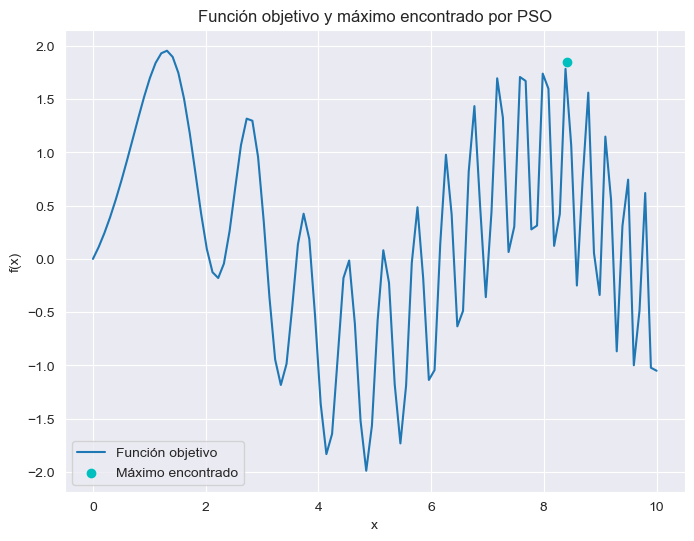

In [186]:
# c.
import matplotlib.pyplot as plt

x_values = np.linspace(0, 10, 100)
y_values = f(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Función objetivo')
plt.scatter(gbest, gbest_fit, color='c', label='Máximo encontrado')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función objetivo y máximo encontrado por PSO')
plt.legend()

plt.show()

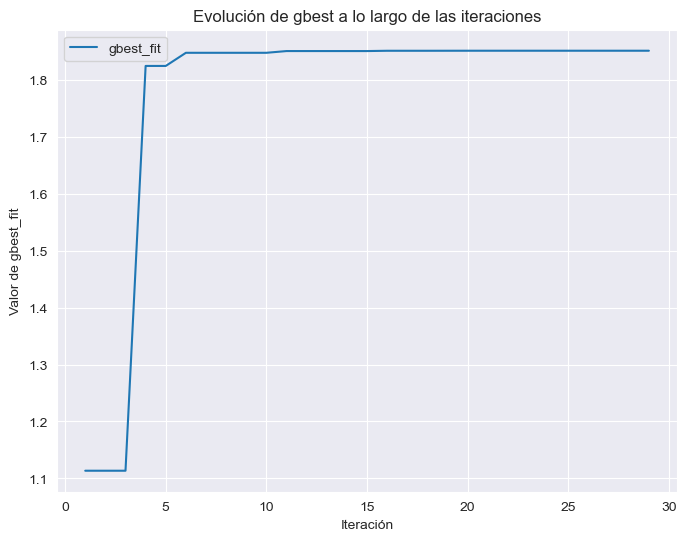

In [187]:
#d.
plt.figure(figsize=(8, 6))
plt.plot(range(max_iterations), gbest_fit_history, label='gbest_fit')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest_fit')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()

e. Como se puede ver en el grafico del punto c, el maximo encontrado se aproxima al maximo absoluto de la funcion y. Luego, en el punto d, se puede ver como varia en un principio el valor gbest y luego de la iteracion 15 se estabiliza en el valor 1.29 y ya se queda en ese valor, lo que nos podria estar indicando que encontro el maximo.

## Ejercicio 2
Dada la siguiente función perteneciente a un paraboloide elíptico de la forma:
$$
f(x,y)=(x-a)^2+(y+b)^2
$$
donde, las constantes a y b son valores reales ingresados por el usuario a través de la consola, con intervalos de:
$$
-100<=x<=100, x \in \Re
$$
$$
-100<=y<=100, y \in \Re
$$
$$
-50<=a<=50, a \in \Re
$$
$$
-50<=b<=50, b \in \Re
$$

escribir en Python un algoritmo PSO para la minimización de la función (1) con
los siguientes parámetros: número de partículas = 20, máximo número de
iteraciones = 10, coeficientes de aceleración c1 = c2 = 2, peso de inercia w =
0.7, y que cumpla con las siguientes consignas:

In [188]:

def PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2):

    # inicialización de particulas
    x = np.zeros((n_particles, n_dimensions))  # matriz para las posiciones de las particulas
    v = np.zeros((n_particles, n_dimensions))  # matriz para las velocidades de las particulas
    pbest = np.zeros((n_particles, n_dimensions))  # matriz para los mejores valores personales
    pbest_fit = np.inf * np.ones(n_particles)  # vector para las mejores aptitudes personales (inicialmente infinito)
    gbest = np.zeros(n_dimensions)  # mejor solución global
    gbest_fit = np.inf  # mejor aptitud global (inicialmente infinito)
    # gbest_history = np.zeros((n_dimensions,max_iterations)) #va guardando el gbest de cada iteracion
    gbest_fit_history = [] #va guardando el gbest de cada iteracion
    
    # inicializacion de particulas factibles
    for i in range(n_particles):
        while True:  # bucle para asegurar que la particula sea factible
            x[i] = np.random.uniform(0, 10, n_dimensions)  # inicializacion posicion aleatoria en el rango [0, 10]
            if g1(x[i]) and g2(x[i]):  # se comprueba si la posicion cumple las restricciones
                break  # Salir del bucle si es factible
        v[i] = np.random.uniform(-1, 1, n_dimensions)  # inicializar velocidad aleatoria
        pbest[i] = x[i].copy()  # ee establece el mejor valor personal inicial como la posicion actual
        fit = f(x[i])  # calculo la aptitud de la posicion inicial
        if fit < pbest_fit[i]:  # si la aptitud es mejor que la mejor conocida
            pbest_fit[i] = fit  # se actualiza el mejor valor personal
    
    # Optimizacion
    for _ in range(max_iterations):  # Repetir hasta el número máximo de iteraciones
        for i in range(n_particles):
            fit = f(x[i])  # Se calcula la aptitud de la posicion actual
            # Se comprueba si la nueva aptitud es mejor y si cumple las restricciones
            if fit < pbest_fit[i] and g1(x[i]) and g2(x[i]):
                pbest_fit[i] = fit  # Se actualiza la mejor aptitud personal
                pbest[i] = x[i].copy()  # Se actualizar la mejor posicion personal
                if fit < gbest_fit:  # Si la nueva aptitud es mejor que la mejor global
                    gbest_fit = fit  # Se actualizar la mejor aptitud global
                    gbest = x[i].copy()  # Se actualizar la mejor posicion global
    
            # actualizacion de la velocidad de la particula
            v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
            x[i] += v[i]  # Se actualiza la posicion de la particula
    
            # se asegura de que la nueva posicion esté dentro de las restricciones
            if not (g1(x[i]) and g2(x[i])):
                # Si la nueva posicion no es válida, revertir a la mejor posicion personal
                x[i] = pbest[i].copy()
        
        gbest_fit_history.append(gbest_fit) 
    
    # Se imprime la mejor solucion encontrada y también su valor optimo
    print(f"Mejor solucion: [{gbest[0]:.4f}, {gbest[1]:.4f}]")
    print(f"Valor optimo: {gbest_fit}")
    return gbest, gbest_fit, gbest_fit_history

# función objetivo a maximizar
def f(x):
    return (x[0]-20)**2+(x[1]-30)**2  # funcion objetivo: (x-a)^2+(y-b)^2


# primera restriccion
def g1(x):
    return -100 <= x[0] <= 100  # restriccion: -100 <= x <= 100


# segunda restriccion
def g2(x):
    return -100 <= x[1] <= 100  # restriccion: -100 <= y <= 100



In [189]:
# # parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
c1 = 2
c2 = 2  # coeficientes de aceleracion
w = 0.7  # Factor de inercia
times2run = 30
gbest = np.zeros((times2run, n_dimensions))
gbest_fit = np.zeros(times2run)
gbest_fit_history = np.zeros((times2run, max_iterations))
for i in range(times2run):
    gbest[i], gbest_fit[i], gbest_fit_history[i] = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)

# print(gbest_fit)

Mejor solucion: [19.9192, 29.9198]
Valor optimo: 0.012963371123215784
Mejor solucion: [19.1773, 30.8366]
Valor optimo: 1.3767907913345685
Mejor solucion: [20.6269, 30.4225]
Valor optimo: 0.571515787933159
Mejor solucion: [21.1833, 28.0576]
Valor optimo: 5.173201704778069
Mejor solucion: [21.2881, 28.4575]
Valor optimo: 4.038469784235985
Mejor solucion: [21.0799, 30.1892]
Valor optimo: 1.2019952844118895
Mejor solucion: [19.7151, 29.6816]
Valor optimo: 0.18255109129126496
Mejor solucion: [20.2628, 30.2283]
Valor optimo: 0.12119074860450565
Mejor solucion: [20.0371, 29.5761]
Valor optimo: 0.18107120422658368
Mejor solucion: [19.7769, 31.8141]
Valor optimo: 3.3408518097863396
Mejor solucion: [18.5461, 29.8422]
Valor optimo: 2.1387620882288774
Mejor solucion: [19.6885, 30.6157]
Valor optimo: 0.47612547055972654
Mejor solucion: [20.4124, 29.2368]
Valor optimo: 0.7526140606832363
Mejor solucion: [20.2041, 29.7310]
Valor optimo: 0.11403582582640223
Mejor solucion: [20.3773, 30.8112]
Valor opt

a. Transcribir en el informe la solución óptima
encontrada (dominio) y el valor óptimo (imagen).

b. Indicar la URL del repositorio en donde se encuentra
el algoritmo PSO.

c. Graficar usando matplotlib la función objetivo f(x, y)
en 3D y agregar un punto rojo en donde el algoritmo haya encontrado el
valor mínimo. El gráfico debe contener etiquetas en los ejes, leyenda y
un título.

d. Realizar un gráfico de línea que muestre gbest en
función de las iteraciones realizadas.

e. Establecer el coeficiente de inercia w en 0, ejecutar el
algoritmo y realizar observaciones/comentarios/conclusiones sobre los
resultados observados.

f. Reescribir el algoritmo PSO para que cumpla
nuevamente con los ítems A hasta F pero usando la biblioteca pyswarm
(from pyswarm import pso).

g. Realizar observaciones/comentarios/conclusiones
comparando los resultados obtenidos sin pyswarm y con pyswarm.

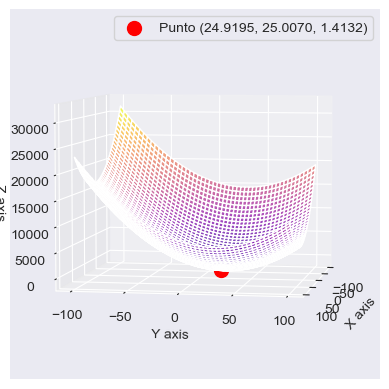

In [190]:

#c. 
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de x y y en el rango de -100 a 100
x = np.linspace(-100, 100, 400)
y = np.linspace(-100, 100, 400)
x, y = np.meshgrid(x, y)

# Definir la función f(x, y) = (x - a)^2 + (y - b)^2
z = (x - 20) ** 2 + (y - 30) ** 2

# Crear el gráfico 3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
# Cambiar el ángulo de visión
ax.view_init(elev=5, azim=10)
# Crear la superficie
ax.plot_surface(x, y, z, cmap='plasma', alpha=0.7)

# Definir un punto
punto_x = sum(gbest[0]) / len(gbest[0])
punto_y = sum(gbest[1]) / len(gbest[1])
punto_z = sum(gbest_fit)/len(gbest_fit)

# Graficar el punto
ax.scatter(punto_x, punto_y, punto_z, color='red', s=100, label=f'Punto ({punto_x:.4f}, {punto_y:.4f}, {punto_z:.4f})')

# Etiquetas de los ejes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Mostrar la leyenda y el gráfico
ax.legend()
plt.show()

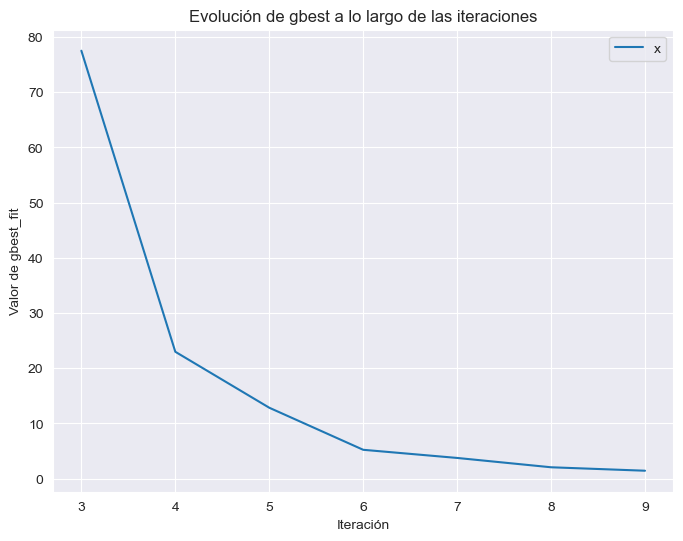

In [191]:
#d.
plt.figure(figsize=(8, 6))
history = np.mean(gbest_fit_history, axis=0)
plt.plot(range(max_iterations), history, label='x')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest_fit')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()

In [192]:
#e.
# función objetivo a maximizar
def f(x):
    return (x[0]-20)**2+(x[1]-30)**2  # funcion objetivo: (x-a)^2+(y-b)^2


# primera restriccion
def g1(x):
    return -100 <= x[0] <= 100  # restriccion: -100 <= x <= 100


# segunda restriccion
def g2(x):
    return -100 <= x[1] <= 100  # restriccion: -100 <= y <= 100


# parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
c1 = c2 = 2  # coeficientes de aceleracion
w = 0.  # Factor de inercia


times2run = 30
gbest_w0 = np.zeros((times2run, n_dimensions))
gbest_fit_w0 = np.zeros(times2run)
gbest_fit_history_w0 = np.zeros((times2run, max_iterations))
for i in range(times2run):
    gbest_w0[i], gbest_fit_w0[i], gbest_fit_history_w0[i] = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)


Mejor solucion: [19.9962, 29.9876]
Valor optimo: 0.00016831425829695484
Mejor solucion: [20.1586, 29.5885]
Valor optimo: 0.19449932912794857
Mejor solucion: [19.6190, 30.1779]
Valor optimo: 0.17680988231994263
Mejor solucion: [19.8943, 30.0326]
Valor optimo: 0.012237923785593342
Mejor solucion: [19.7363, 30.4321]
Valor optimo: 0.2562653127358505
Mejor solucion: [19.8129, 29.5632]
Valor optimo: 0.22582976134100527
Mejor solucion: [18.0489, 32.1764]
Valor optimo: 8.543354537999909
Mejor solucion: [19.2656, 30.9674]
Valor optimo: 1.4753426525499167
Mejor solucion: [19.9964, 30.0134]
Valor optimo: 0.00019333358123457383
Mejor solucion: [20.3632, 29.6864]
Valor optimo: 0.23024556375555383
Mejor solucion: [19.9036, 29.9766]
Valor optimo: 0.009845226483946383
Mejor solucion: [25.8161, 24.5637]
Valor optimo: 63.379698169152874
Mejor solucion: [20.0278, 29.4646]
Valor optimo: 0.2874639577325157
Mejor solucion: [15.7892, 32.4323]
Valor optimo: 23.647314438076798
Mejor solucion: [20.0298, 29.9829

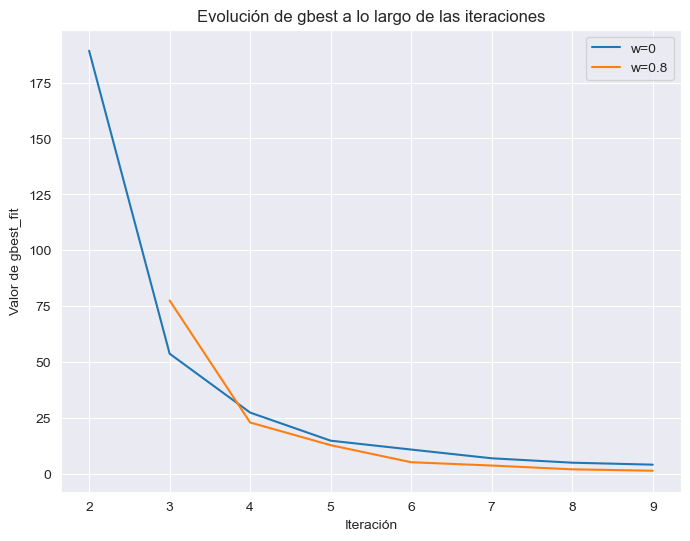

In [193]:
#d.
plt.figure(figsize=(8, 6))
history_w0 = np.mean(gbest_fit_history_w0, axis=0)
plt.plot(range(max_iterations), history_w0, label='w=0')
plt.plot(range(max_iterations), history, label='w=0.8')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest_fit')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()

In [194]:
#f.
from pyswarm import pso

# Función modificada para registrar el mejor valor global en cada iteración
a = 20  #constante en la funcion, esto se puede hacer para que lo agergue el usuario por consola
b = 30  #constante en la funcion, esto se puede hacer para que lo agergue el usuario por consola

# función objetivo
def funcion_objetivo(x):
    return (x[0]-a)**2+(x[1]-b)**2

lb = [-100, -100]  # limite inf
ub = [100, 100]  # limite sup

# parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
historial_gbest = []

# Llamada a la función pso
solucion_optima, valor_optimo= pso(funcion_objetivo, lb, ub, swarmsize=n_particles, maxiter=max_iterations, debug=True, omega=0.7)

# Resultados
print("\nSolución óptima (x, y):", solucion_optima)
print("Valor óptimo:", valor_optimo)

No constraints given.
Best after iteration 1: [10.55072563 34.39156152] 108.57459865505315
Best after iteration 2: [10.55072563 34.39156152] 108.57459865505315
New best for swarm at iteration 3: [25.05274496 37.7087132 ] 84.9544908729099
Best after iteration 3: [25.05274496 37.7087132 ] 84.9544908729099
Best after iteration 4: [25.05274496 37.7087132 ] 84.9544908729099
New best for swarm at iteration 5: [14.98108872 29.46433216] 25.476410438696327
Best after iteration 5: [14.98108872 29.46433216] 25.476410438696327
Best after iteration 6: [14.98108872 29.46433216] 25.476410438696327
New best for swarm at iteration 7: [22.52591692 32.5732599 ] 13.001922833883558
Best after iteration 7: [22.52591692 32.5732599 ] 13.001922833883558
Best after iteration 8: [22.52591692 32.5732599 ] 13.001922833883558
New best for swarm at iteration 9: [19.18800209 31.72285324] 3.627563901511488
Best after iteration 9: [19.18800209 31.72285324] 3.627563901511488
Best after iteration 10: [19.18800209 31.7228

## Ejercicio 3

Maximizar mediante PSO en Python y con parámetros a elección la función:
$$
z=e^{-0.1\cdot (x^2+y^2)}\cdot cos(x)\cdot sin(x)
$$
donde el intervalo de las variables de decisión se encuentra en el rango 
$$
-50 <= (x, y) <= 50. 
$$

In [195]:
#e.
# función objetivo a maximizar
def f(x):
    return np.exp(-0.1*(x[0]**2+x[1]**2))*np.cos(x[0])*np.sin(x[0])


# primera restriccion


def g1(x):
    return -50 <= x[0] <= 50  # restriccion: -100 <= x <= 100


# segunda restriccion
def g2(x):
    return -50 <= x[1] <= 50  # restriccion: -100 <= y <= 100

def PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2):

    # inicialización de particulas
    x = np.zeros((n_particles, n_dimensions))  # matriz para las posiciones de las particulas
    v = np.zeros((n_particles, n_dimensions))  # matriz para las velocidades de las particulas
    pbest = np.zeros((n_particles, n_dimensions))  # matriz para los mejores valores personales
    pbest_fit = -np.inf * np.ones(n_particles)  # vector para las mejores aptitudes personales (inicialmente-infinito)
    gbest = np.zeros(n_dimensions)  # mejor solución global
    gbest_fit = -np.inf  # mejor aptitud global (inicialmente -infinito)
    # gbest_history = np.zeros((n_dimensions,max_iterations)) #va guardando el gbest de cada iteracion
    gbest_fit_history = [] #va guardando el gbest de cada iteracion
    
    # inicializacion de particulas factibles
    for i in range(n_particles):
        while True:  # bucle para asegurar que la particula sea factible
            x[i] = np.random.uniform(0, 10, n_dimensions)  # inicializacion posicion aleatoria en el rango [0, 10]
            if g1(x[i]) and g2(x[i]):  # se comprueba si la posicion cumple las restricciones
                break  # Salir del bucle si es factible
        v[i] = np.random.uniform(-1, 1, n_dimensions)  # inicializar velocidad aleatoria
        pbest[i] = x[i].copy()  # ee establece el mejor valor personal inicial como la posicion actual
        fit = f(x[i])  # calculo la aptitud de la posicion inicial
        if fit > pbest_fit[i]:  # si la aptitud es mejor que la mejor conocida
            pbest_fit[i] = fit  # se actualiza el mejor valor personal
    
    # Optimizacion
    for _ in range(max_iterations):  # Repetir hasta el número máximo de iteraciones
        for i in range(n_particles):
            fit = f(x[i])  # Se calcula la aptitud de la posicion actual
            # Se comprueba si la nueva aptitud es mejor y si cumple las restricciones
            if fit > pbest_fit[i] and g1(x[i]) and g2(x[i]):
                pbest_fit[i] = fit  # Se actualiza la mejor aptitud personal
                pbest[i] = x[i].copy()  # Se actualizar la mejor posicion personal
                if fit > gbest_fit:  # Si la nueva aptitud es mejor que la mejor global
                    gbest_fit = fit  # Se actualizar la mejor aptitud global
                    gbest = x[i].copy()  # Se actualizar la mejor posicion global
    
            # actualizacion de la velocidad de la particula
            v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
            x[i] += v[i]  # Se actualiza la posicion de la particula
    
            # se asegura de que la nueva posicion esté dentro de las restricciones
            if not (g1(x[i]) and g2(x[i])):
                # Si la nueva posicion no es válida, revertir a la mejor posicion personal
                x[i] = pbest[i].copy()
        
        gbest_fit_history.append(gbest_fit) 
    
    # Se imprime la mejor solucion encontrada y también su valor optimo
    print(f"Mejor solucion: [{gbest[0]:.4f}, {gbest[1]:.4f}]")
    print(f"Valor optimo: {gbest_fit}")
    return gbest, gbest_fit, gbest_fit_history

# # parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
c1 = 2
c2 = 2  # coeficientes de aceleracion
w = 0.7  # Factor de inercia

gbest, gbest_fit, gbest_fit_history = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)

Mejor solucion: [0.5760, 0.9320]
Valor optimo: 0.40510452312978884


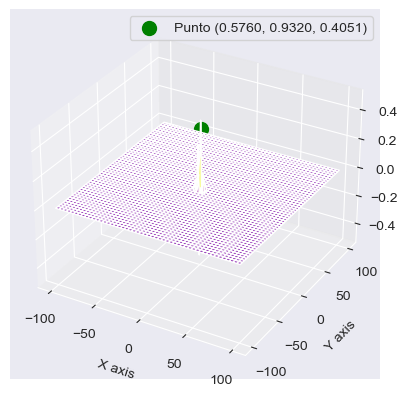

In [196]:
#c. 
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de x y y en el rango de -100 a 100
x = np.linspace(-100, 100, 400)
y = np.linspace(-100, 100, 400)
x, y = np.meshgrid(x, y)

# Definir la función f(x, y) = (x - a)^2 + (y - b)^2
z = np.exp(-0.1*(x**2+y**2))*np.cos(x)*np.sin(x)

# Crear el gráfico 3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
# Cambiar el ángulo de visión
# ax.view_init(elev=5, azim=10)
# Crear la superficie
ax.plot_surface(x, y, z, cmap='plasma', alpha=0.7)

# Definir un punto
punto_x = gbest[0]
punto_y = gbest[1]
punto_z = gbest_fit

# Graficar el punto
ax.scatter(punto_x, punto_y, punto_z, color='green', s=100, label=f'Punto ({punto_x:.4f}, {punto_y:.4f}, {punto_z:.4f})')

# Etiquetas de los ejes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Mostrar la leyenda y el gráfico
ax.legend()
plt.show()

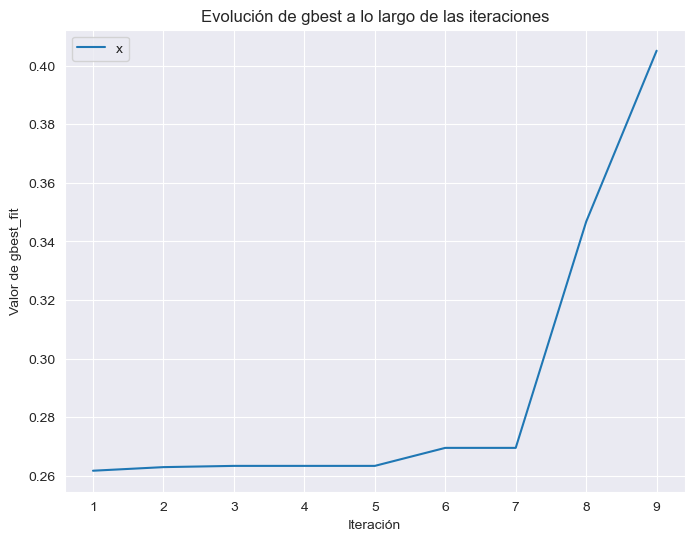

In [197]:
#d.
plt.figure(figsize=(8, 6))
plt.plot(range(max_iterations), gbest_fit_history, label='x')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest_fit')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()

In [198]:
# # parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
c1 = 2
c2 = 2  # coeficientes de aceleracion
w = 0.  # Factor de inercia

gbest, gbest_fit, gbest_fit_history = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)

Mejor solucion: [0.7187, 0.6235]
Valor optimo: 0.45266462661719886


Mejor solucion: [0.8032, 0.0507]
Valor optimo: 0.4683480824461777
Mejor solucion: [0.7621, -0.0824]
Valor optimo: 0.470955049617271
Mejor solucion: [0.6998, 0.2779]
Valor optimo: 0.46553570005969225


Text(0, 0.5, 'Valores')

<Figure size 1000x600 with 0 Axes>

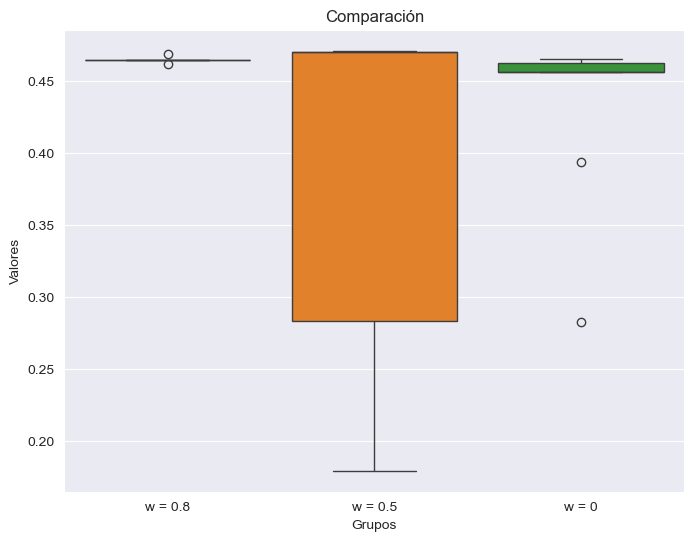

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# # parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
c1 = 2
c2 = 2  # coeficientes de aceleracion
gbest = [0,0,0]
gbest_fit = [0,0,0]
gbest_fit_history = [0,0,0]

gbest[0], gbest_fit[0], gbest_fit_history[0] = PSO(n_particles, n_dimensions, max_iterations, c1, c2, 0.8, f, g1, g2)
gbest[1], gbest_fit[1], gbest_fit_history[1] = PSO(n_particles, n_dimensions, max_iterations, c1, c2, 0.5, f, g1, g2)
gbest[2], gbest_fit[2], gbest_fit_history[2] = PSO(n_particles, n_dimensions, max_iterations, c1, c2, 0, f, g1, g2)
# Suponiendo que tienes una lista de listas llamada 'gbest_data' con la siguiente estructura:
# gbest_data = [[gbest_values_for_w_0.8], [gbest_values_for_w_0.5], [gbest_values_for_w_0]]

# Crear el gráfico de boxplots
plt.figure(figsize=(10, 6))

# Etiquetas para cada grupo de datos
labels = ['w = 0.8', 'w = 0.5', 'w = 0']

# Creando el gráfico
plt.figure(figsize=(8, 6))
sns.boxplot(data=gbest_fit_history)
plt.xticks(ticks=[0, 1, 2], labels=labels)

# Añadir título y etiquetas
plt.title('Comparación')
plt.xlabel('Grupos')
plt.ylabel('Valores')